# Handwritten Digit Recognition


In [1]:
from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf
tf.test.gpu_device_name()

Mounted at /content/drive


''

# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import plotly.express as px
import seaborn as sns
# %matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D ,BatchNormalization ,MaxPooling2D
from keras.optimizers import RMSprop ,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau , LearningRateScheduler

# Data Loading

In [3]:
# loding the data pathes
train =pd.read_csv("/content/drive/MyDrive/dataset /train.csv")
test  =pd.read_csv("/content/drive/MyDrive/dataset /test.csv")
print ("the shape of train data is " , train.shape )
print ("the shape of test data is " , test.shape )

the shape of train data is  (42000, 785)
the shape of test data is  (28000, 784)


In [4]:
X_train=train.drop(labels = ["label"],axis = 1)
Y_train=train['label']

# Data Preprocessing

In [5]:
# Normalization
X_train = X_train / 255.0
test = test / 255.0

# Reshaping
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

# encoding the labels
Y_train = to_categorical(Y_train, num_classes=10)

# Split the train and the validation set for the fitting
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size = 0.2, random_state=42)

# CNN Model

In [6]:
CNN_model = Sequential()

CNN_model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
CNN_model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu'))
CNN_model.add(MaxPool2D(pool_size=(2,2)))
CNN_model.add(Dropout(0.25))

CNN_model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
CNN_model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
CNN_model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
CNN_model.add(Dropout(0.25))

CNN_model.add(Flatten())
CNN_model.add(Dense(256, activation = "relu"))
CNN_model.add(Dropout(0.5))
CNN_model.add(Dense(10, activation = "softmax"))

In [7]:
# Crea el optimizador RMSprop utilizando la versión legacy
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08)

CNN_model.compile(loss='categorical_crossentropy', optimizer = optimizer, metrics=["accuracy"])

#annealer = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

#learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',patience=3,  verbose=1, factor=0.5, min_lr=0.00001)

In [9]:
history = CNN_model.fit(
                           X_train,Y_train,
                           steps_per_epoch=500,
                           epochs=10,
                           verbose=2,  #1 for ETA, 0 for silent
                           validation_data=(X_test[:400,:], Y_test[:400,:]), #For speed
)

Epoch 1/10
500/500 - 201s - loss: 0.1715 - accuracy: 0.9461 - val_loss: 0.1184 - val_accuracy: 0.9700 - 201s/epoch - 401ms/step
Epoch 2/10
500/500 - 199s - loss: 0.0761 - accuracy: 0.9768 - val_loss: 0.0417 - val_accuracy: 0.9800 - 199s/epoch - 397ms/step
Epoch 3/10
500/500 - 198s - loss: 0.0573 - accuracy: 0.9828 - val_loss: 0.0678 - val_accuracy: 0.9825 - 198s/epoch - 395ms/step
Epoch 4/10
500/500 - 198s - loss: 0.0477 - accuracy: 0.9852 - val_loss: 0.0566 - val_accuracy: 0.9800 - 198s/epoch - 395ms/step
Epoch 5/10
500/500 - 197s - loss: 0.0431 - accuracy: 0.9875 - val_loss: 0.0531 - val_accuracy: 0.9800 - 197s/epoch - 393ms/step
Epoch 6/10
500/500 - 196s - loss: 0.0370 - accuracy: 0.9891 - val_loss: 0.0353 - val_accuracy: 0.9850 - 196s/epoch - 391ms/step
Epoch 7/10
500/500 - 196s - loss: 0.0332 - accuracy: 0.9904 - val_loss: 0.0561 - val_accuracy: 0.9850 - 196s/epoch - 392ms/step
Epoch 8/10
500/500 - 205s - loss: 0.0324 - accuracy: 0.9902 - val_loss: 0.1485 - val_accuracy: 0.9750 - 

500/500 - 192s - loss: 0.0280 - accuracy: 0.9917 - val_loss: 0.0322 - val_accuracy: 0.9900 - 192s/epoch - 384ms/step


In [10]:
prediction = CNN_model.predict(X_test)

preds = np.argmax(prediction, axis=1)

263/263 [==============================] - 36s 136ms/step


In [11]:
# Model Accuracy
final_loss, final_acc = CNN_model.evaluate(X_test, Y_test, verbose=0)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

Final loss: 0.0262, final accuracy: 0.9917


# Evaluation

In [12]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'


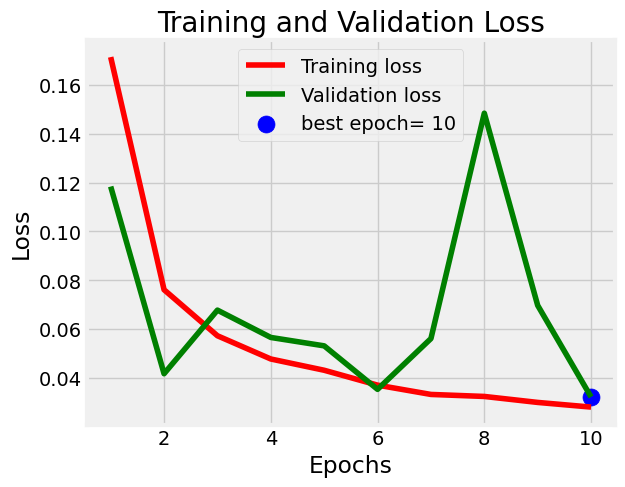

In [13]:
# Plot training history
plt.figure(figsize= (15, 5))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout
plt.show()

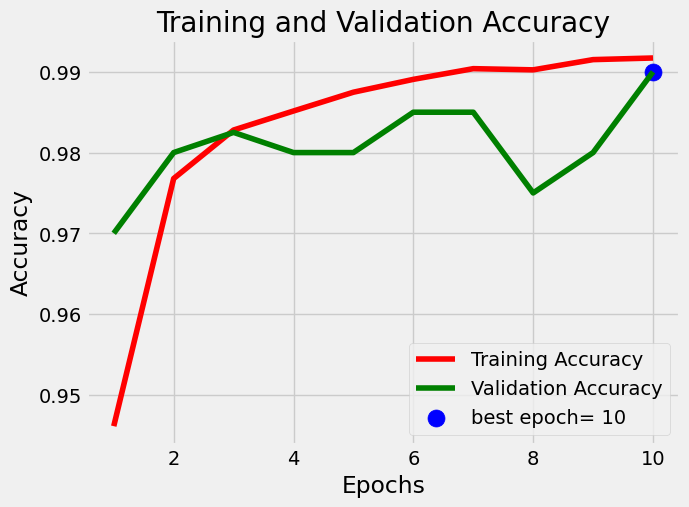

In [14]:
# Plot training history
plt.figure(figsize= (15, 5))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

263/263 [==============================] - 26s 101ms/step


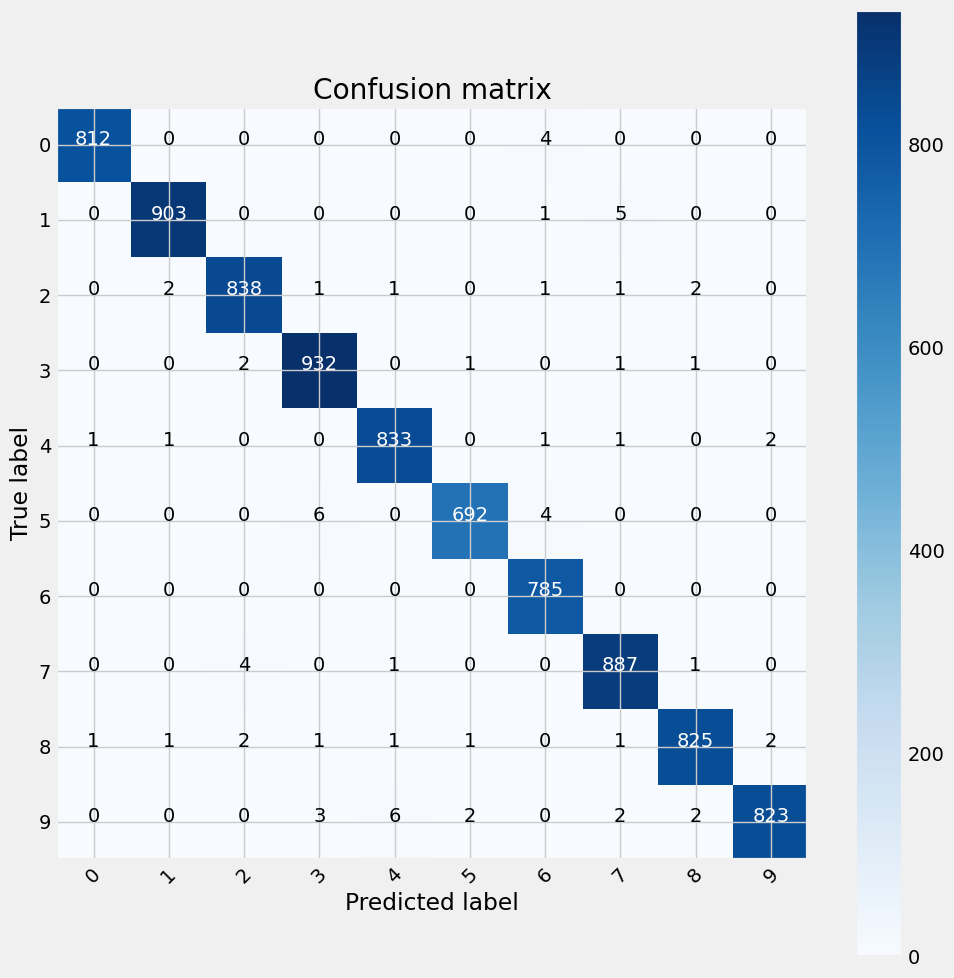

In [15]:
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):

    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = CNN_model.predict(X_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))